# Background

"Electricity demand patterns matter for valuing electricity supply resources" 
http://www.eia.gov/todayinenergy/detail.cfm?id=12711

"Case study of daily electricity demand in New England" (shows hourly curve): http://www.eia.gov/todayinenergy/detail.cfm?id=830


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import sklearn
%matplotlib inline

## Weather ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [124]:
boston_weather = pd.read_csv("~/travis_python/FINAL/boston_weather_2014.csv", header=1)
boston_weather = boston_weather[boston_weather.high != 'high']

In [125]:
boston_weather["date"] = pd.DatetimeIndex(start='1/1/2014', periods=365, freq='d')

In [126]:
boston_weather.drop('Jan', axis=1, inplace=True)

In [127]:
boston_weather["high"] = boston_weather["high"].apply(int)
boston_weather["avg"] = boston_weather["avg"].apply(int)
boston_weather["low"] = boston_weather["low"].apply(int)

In [128]:
def to_fahrenheit(temp):
    return (temp * (9 / 5) + 32).round(1)
    

In [129]:
boston_weather["high"] = boston_weather['high'].apply(to_fahrenheit)
boston_weather["avg"] = boston_weather['avg'].apply(to_fahrenheit)
boston_weather["low"] = boston_weather['low'].apply(to_fahrenheit)

In [130]:
boston_weather.head()

,high,avg,low,date
0,28.4,24.8,19.4,2014-01-01
1,26.6,14.0,1.4,2014-01-02
2,14.0,8.6,1.4,2014-01-03
3,26.6,15.8,1.4,2014-01-04
4,37.4,30.2,24.8,2014-01-05


<function matplotlib.pyplot.show>

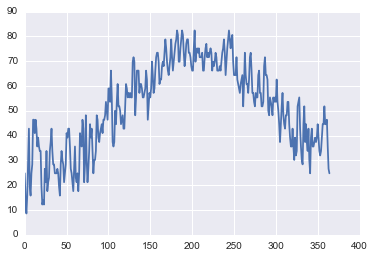

In [131]:
plt.plot(boston_weather.avg)
ylabel
plt.show

## Daily Climate Aves

In [132]:
daily_climate = pd.read_csv("~/travis_python/FINAL/dailyclimate.csv", header=1)
list(daily_climate.columns.values)

['Mo Dy', 'MaxT', 'AveT', 'MinT']

In [133]:
def convert_daily_climate(a):
    return float(a).round(1)

In [134]:
daily_climate["MaxT"] = daily_climate["MaxT"].apply(float)
daily_climate["AveT"] = daily_climate["AveT"].apply(float)
daily_climate["MinT"] = daily_climate["MinT"].apply(float)
#daily_climate = daily_climate.set_index("Mo Dy")

In [168]:
daily_climate.head()

,Mo Dy,MaxT,AveT,MinT
0,1/ 1,37.8,30.7,23.6
1,1/ 2,37.6,30.5,23.4
2,1/ 3,37.5,30.4,23.3
3,1/ 4,37.3,30.2,23.1
4,1/ 5,37.2,30.1,22.9


In [161]:
len(boston_weather.avg)

365

## Daily Deviation

In [136]:
boston_weather["high_climate"] = daily_climate.MaxT
boston_weather["ave_climate"] = daily_climate.AveT
boston_weather["low_climate"] = daily_climate.MinT


In [137]:
boston_weather = boston_weather.set_index("date")

In [138]:
boston_weather["avg_deviation"] = boston_weather.avg - boston_weather.ave_climate

<function matplotlib.pyplot.show>

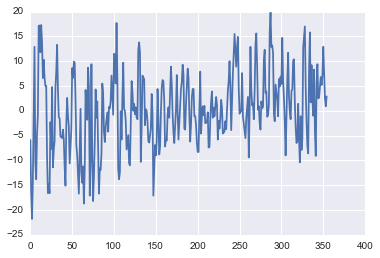

In [139]:
plt.plot(boston_weather.avg_deviation)
plt.show

In [140]:
boston_weather.to_csv("weat_clim_dev.csv")

In [141]:
boston_weather.tail()

,high,avg,low,high_climate,ave_climate,low_climate,avg_deviation
date,,,,,,,
2014-12-27,51.8,44.6,37.4,NaN,NaN,NaN,NaN
2014-12-28,51.8,46.4,39.2,NaN,NaN,NaN,NaN
2014-12-29,41.0,35.6,30.2,NaN,NaN,NaN,NaN
2014-12-30,30.2,26.6,21.2,NaN,NaN,NaN,NaN
2014-12-31,30.2,24.8,19.4,NaN,NaN,NaN,NaN


# Energy Data

In [4]:
energy_source = pd.read_csv("~/travis_python/homework/FINAL/FINAL/2014_energy_peak_source.csv", header=1)
energy_source

,2014,Date,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,System Peak Load (MW),24443,21334,19653,19695,16012,16222,21263,24443,22694,23715,17053,18369,19843,NaN,NaN,NaN,NaN,NaN
2,Generation,23157,20493,17396,16261,13704,14449,19667,23157,19974,21220,14974,14899,16655,NaN,NaN,NaN,NaN,NaN
3,Pumping Load,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,Net Flow Over External Ties,-1286,-841,-2257,-3434,-2308,-1773,-1596,-1286,-2720,-2495,-2079,-3470,-3188,NaN,NaN,NaN,NaN,NaN
5,Imports,NaN,-2302,-2554,-3762,-2758,-2288,-2247,-1840,-3052,-3042,-2273,-3530,-3204,NaN,NaN,NaN,NaN,NaN
6,Exports,NaN,1461,297,328,450,516,651,554,332,547,194,60,16,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,System Minimum Load (MW),NaN,10492,11005,10618,9326,9135,9196,10050,9923,9309,9216,9830,9896,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


hourly_jan01 = requests.get("https://webservices.iso-ne.com/api/v1.1/combinedhourlydemand/day/20140101/location/4008.json", auth=('travisknop@gmail.com', 'Nirvana1'))
hourly_jan02 = requests.get("https://webservices.iso-ne.com/api/v1.1/combinedhourlydemand/day/20140102/location/4008.json", auth=('travisknop@gmail.com', 'Nirvana1'))
list(hourly_jan01)

### Common ISO-NE Abbrevs

drtp = demand response threshhold price
lmp = Locational Marginal Pricing

In [143]:
flows2014 = pd.read_csv("~/travis_python/FINAL/2014_hourly_flows.csv", header=3)
flows2014.head()

,day,hour,avg_BSTN_act,avg_BSTN_limit,counterflow,avg_CT_IMP_act,avg_CT_IMP_limit,counterflow.1,avg_MENH_act,avg_MENH_limit,...,counterflow.9,avg_SWCT_act,avg_SWCT_limit,counterflow.10,avg_S_PD_S_act,avg_S_PD_S_limit,counterflow.11,avg_WESTCT_act,avg_WESTCT_limit,counterflow.12
0,1/1/14,1,"\t1,755","\t3,770",NaN,\t(596),NaN,1,\t(71),"\t1,700",...,NaN,\t54,"\t2,879",1,"\t1,465","\t4,500",NaN,\t642,"\t2,912",NaN
1,1/1/14,2,"\t1,829","\t3,968",NaN,\t(918),NaN,1,\t(171),"\t1,700",...,NaN,\t(167),"\t2,866",1,"\t1,419","\t4,586",NaN,\t345,"\t2,791",NaN
2,1/1/14,3,"\t1,784","\t3,975",NaN,\t(991),NaN,1,\t(13),"\t1,600",...,NaN,\t(172),"\t2,866",1,"\t1,478","\t4,506",NaN,\t300,"\t2,736",NaN
3,1/1/14,4,"\t1,820","\t3,987",NaN,\t(794),NaN,1,\t219,"\t1,550",...,NaN,\t91,"\t3,005",1,"\t1,538","\t4,476",NaN,\t511,"\t2,674",NaN
4,1/1/14,5,"\t2,147","\t4,043",NaN,\t(937),NaN,1,\t283,"\t1,575",...,NaN,\t(59),"\t3,023",1,"\t1,574","\t4,700",NaN,\t365,"\t2,666",NaN


In [144]:
demand2014a = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140101_20140214.csv", header=6)
demand2014a.head()

,H,Date,Hour ending,MWH,MWH.1
0,D,2014-01-01,1,1477.8,1639.7
1,D,2014-01-01,2,1426.2,1556.4
2,D,2014-01-01,3,1389.4,1503.7
3,D,2014-01-01,4,1311.5,1482.1
4,D,2014-01-01,5,1307.7,1489.2


(MWH is day-ahead demand, MWH.1 is actual real-time demand)

In [145]:
demand2014b = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140215_20140331.csv", header=6)
demand2014c = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140401_20140515.csv", header=6)
demand2014d = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140516_20140629.csv", header=6)
demand2014e = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140630_20140813.csv", header=6)
demand2014f = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140814_20140927.csv", header=6)
demand2014g = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20140928_20141110.csv", header=6)
demand2014h = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20141111_20141225.csv", header=6)
demand2014i = pd.read_csv("~/downloads/OI_darthrmwh_iso_4006_20141226_20150208.csv", header=6)


In [146]:
df1 = [demand2014a, demand2014b, demand2014c, demand2014d, demand2014e, demand2014f, demand2014g, demand2014h, demand2014i]
hourlydemand14 = pd.concat(df1)

In [147]:
hourlydemand14.head()

,H,Date,Hour ending,MWH,MWH.1
0,D,2014-01-01,1,1477.8,1639.7
1,D,2014-01-01,2,1426.2,1556.4
2,D,2014-01-01,3,1389.4,1503.7
3,D,2014-01-01,4,1311.5,1482.1
4,D,2014-01-01,5,1307.7,1489.2


In [148]:
hourlydemand14.groupby("Date")

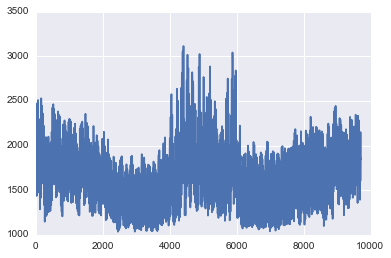

In [149]:
plt.plot(hourlydemand14["MWH.1"])


In [150]:
hourlydemand14.set_index("Date")

,H,Hour ending,MWH,MWH.1
Date,,,,
2014-01-01,D,1,1477.8,1639.7
2014-01-01,D,2,1426.2,1556.4
2014-01-01,D,3,1389.4,1503.7
2014-01-01,D,4,1311.5,1482.1
2014-01-01,D,5,1307.7,1489.2
2014-01-01,D,6,1365.0,1522.9
2014-01-01,D,7,1444.2,1573.0
2014-01-01,D,8,1527.5,1617.1
2014-01-01,D,9,1697.6,1697.2


In [151]:
pd.groupby(hourlydemand14, hourlydemand14.Date)

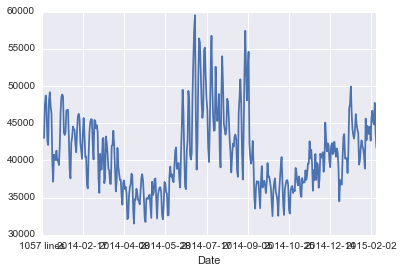

In [228]:
daily_energy = hourlydemand14.groupby("Date").aggregate(np.sum)
daily_energy["MWH.1"].plot()

In [153]:
daily_data = boston_weather
daily_data["MWH"] = daily_energy["MWH.1"]
daily_data.head()

,high,avg,low,high_climate,ave_climate,low_climate,avg_deviation,MWH
date,,,,,,,,
2014-01-01,28.4,24.8,19.4,37.8,30.7,23.6,-5.9,NaN
2014-01-02,26.6,14.0,1.4,37.6,30.5,23.4,-16.5,NaN
2014-01-03,14.0,8.6,1.4,37.5,30.4,23.3,-21.8,NaN
2014-01-04,26.6,15.8,1.4,37.3,30.2,23.1,-14.4,NaN
2014-01-05,37.4,30.2,24.8,37.2,30.1,22.9,0.1,NaN


In [169]:
one_year_energy = daily_energy["MWH.1"][3:368]
train_energy = daily_energy["MWH.1"][3:275]
one_year_energy

Date
2014-01-01    43012.0
2014-01-02    47503.8
2014-01-03    48729.1
2014-01-04    47014.7
2014-01-05    42622.8
2014-01-06    42064.3
2014-01-07    48095.7
2014-01-08    49173.4
2014-01-09    47212.0
2014-01-10    46293.5
2014-01-11    39783.6
2014-01-12    37138.8
2014-01-13    40778.3
2014-01-14    40204.2
2014-01-15    40047.5
2014-01-16    41308.6
2014-01-17    39979.6
2014-01-18    40036.9
2014-01-19    39362.3
2014-01-20    41921.7
2014-01-21    46478.2
2014-01-22    48520.2
2014-01-23    48862.1
2014-01-24    48606.4
2014-01-25    43720.4
2014-01-26    43425.1
2014-01-27    43735.0
2014-01-28    46695.8
2014-01-29    46777.6
2014-01-30    46821.6
               ...   
2014-12-02    40891.6
2014-12-03    40347.5
2014-12-04    40622.9
2014-12-05    41108.0
2014-12-06    38468.7
2014-12-07    39633.0
2014-12-08    45078.7
2014-12-09    42903.9
2014-12-10    41214.7
2014-12-11    42285.8
2014-12-12    42033.1
2014-12-13    39886.2
2014-12-14    39092.7
2014-12-15    41798.8
2014-

In [155]:
type(one_year_energy)


pandas.core.series.Series

In [174]:
daily_data = daily_data.merge(one_year_energy.to_frame(), left_index=True, right_index=True)

In [157]:
boston_weather.tail()

,high,avg,low,high_climate,ave_climate,low_climate,avg_deviation,MWH
date,,,,,,,,
2014-12-27,51.8,44.6,37.4,NaN,NaN,NaN,NaN,NaN
2014-12-28,51.8,46.4,39.2,NaN,NaN,NaN,NaN,NaN
2014-12-29,41.0,35.6,30.2,NaN,NaN,NaN,NaN,NaN
2014-12-30,30.2,26.6,21.2,NaN,NaN,NaN,NaN,NaN
2014-12-31,30.2,24.8,19.4,NaN,NaN,NaN,NaN,NaN


In [158]:
daily_data = daily_data.drop("MWH", 1)

In [159]:
daily_data.describe()

,high,avg,low,high_climate,ave_climate,low_climate,avg_deviation
count,365.000000,365.000000,365.000000,355.000000,355.000000,355.000000,355.000000
mean,58.674521,51.479452,43.820822,59.275775,51.599437,43.923099,0.195493
std,18.621273,17.718257,17.249934,15.993432,15.555496,15.122445,7.670803
min,14.000000,8.600000,1.400000,36.000000,28.800000,21.600000,-21.800000
25%,44.600000,37.400000,30.200000,44.050000,36.900000,29.750000,-4.650000
50%,59.000000,53.600000,46.400000,59.000000,51.200000,43.500000,0.000000
75%,73.400000,66.200000,59.000000,74.800000,66.600000,58.400000,5.000000
max,93.200000,82.400000,73.400000,82.800000,74.500000,66.300000,19.800000


In [172]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [173]:
daily_data.describe()

,high,avg,low,high_climate,ave_climate,low_climate,avg_deviation
count,365.000000,365.000000,365.000000,355.000000,355.000000,355.000000,355.000000
mean,58.674521,51.479452,43.820822,59.275775,51.599437,43.923099,0.195493
std,18.621273,17.718257,17.249934,15.993432,15.555496,15.122445,7.670803
min,14.000000,8.600000,1.400000,36.000000,28.800000,21.600000,-21.800000
25%,44.600000,37.400000,30.200000,44.050000,36.900000,29.750000,-4.650000
50%,59.000000,53.600000,46.400000,59.000000,51.200000,43.500000,0.000000
75%,73.400000,66.200000,59.000000,74.800000,66.600000,58.400000,5.000000
max,93.200000,82.400000,73.400000,82.800000,74.500000,66.300000,19.800000


In [175]:
daily_data.head()

,high,avg,low,high_climate,ave_climate,low_climate,avg_deviation,MWH.1
date,,,,,,,,
2014-01-01,28.4,24.8,19.4,37.8,30.7,23.6,-5.9,43012.0
2014-01-02,26.6,14.0,1.4,37.6,30.5,23.4,-16.5,47503.8
2014-01-03,14.0,8.6,1.4,37.5,30.4,23.3,-21.8,48729.1
2014-01-04,26.6,15.8,1.4,37.3,30.2,23.1,-14.4,47014.7
2014-01-05,37.4,30.2,24.8,37.2,30.1,22.9,0.1,42622.8


In [182]:
reshaped_daily_data = daily_data.index.values.reshape((-1, 1))

In [224]:
def plot_regression(fn):
    # scatter plot first
    plt.scatter(daily_data.avg, daily_data["MWH.1"])
    xmin, xmax = plt.xlim(xmin=0, xmax = 100)
    xs = np.linspace(xmin, xmax, 100)
    # fn is our (y = mx + b) expression
    plt.ylim(ymax=65000, ymin=30000)
    plt.plot(xs, [fn(x) for x in xs], color="red", linewidth=3)

[  4.99376888e+04  -1.07990813e+02  -4.08934688e+00  -8.76523471e-02
   2.04769096e-03]
0.0


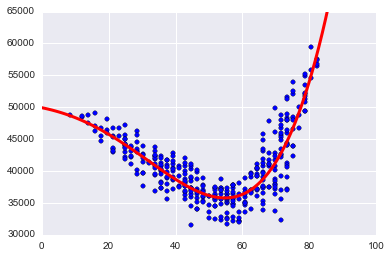

In [225]:
model = Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression(fit_intercept=False))])
model.fit(reshaped_daily_data, arrayed_mwh)

# The slope and intercept appear to be flipped?
print(model.named_steps['linear'].coef_)
print(model.named_steps['linear'].intercept_)
# print('Variance Score: %.2f' % model.score(reshaped_sleep_values, sleep_by_age.mean_minutes.values))

fn = lambda x: model.predict(x)[0]
plot_regression(fn)

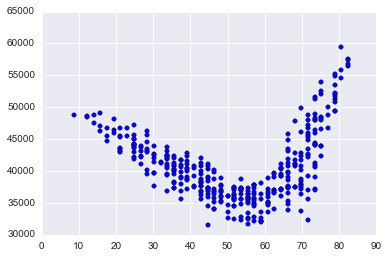

In [177]:
plt.scatter(daily_data.avg, daily_data["MWH.1"])
plt.show()

In [186]:
daily_data["MWH.1"].values

array([ 43012. ,  47503.8,  48729.1,  47014.7,  42622.8,  42064.3,
        48095.7,  49173.4,  47212. ,  46293.5,  39783.6,  37138.8,
        40778.3,  40204.2,  40047.5,  41308.6,  39979.6,  40036.9,
        39362.3,  41921.7,  46478.2,  48520.2,  48862.1,  48606.4,
        43720.4,  43425.1,  43735. ,  46695.8,  46777.6,  46821.6,
        43206.6,  38891.7,  37582.9,  42373.4,  43133.7,  44557.1,
        44209.9,  44067.2,  42192.6,  41093.5,  44021.9,  45896.3,
        46253.5,  45597.3,  42384.3,  41339.5,  40208.3,  43614.2,
        45700.2,  43446.6,  40438.4,  40540.8,  36724.2,  36234.5,
        40788.4,  43851.2,  45088.8,  45548.5,  45501.2,  42168.6,
        40122.5,  45421.2,  45358.5,  44299.5,  44718.5,  43758.4,
        37605.4,  35633.8,  40879.3,  38755. ,  38824.3,  42943.9,
        43011.2,  36943.2,  37625.8,  43213. ,  42309.7,  40858. ,
        38850.1,  38661.3,  36879.9,  36836.1,  41954.1,  42069.8,
        43988.6,  42028. ,  38904.9,  35824.8,  37164. ,  4166

In [187]:
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
X, y = samples_generator.make_classification(
     n_informative=5, n_redundant=0, random_state=42)



In [192]:
arrayed_mwh = np.asarray(daily_data["MWH.1"])
arrayed_mwh

array([ 43012. ,  47503.8,  48729.1,  47014.7,  42622.8,  42064.3,
        48095.7,  49173.4,  47212. ,  46293.5,  39783.6,  37138.8,
        40778.3,  40204.2,  40047.5,  41308.6,  39979.6,  40036.9,
        39362.3,  41921.7,  46478.2,  48520.2,  48862.1,  48606.4,
        43720.4,  43425.1,  43735. ,  46695.8,  46777.6,  46821.6,
        43206.6,  38891.7,  37582.9,  42373.4,  43133.7,  44557.1,
        44209.9,  44067.2,  42192.6,  41093.5,  44021.9,  45896.3,
        46253.5,  45597.3,  42384.3,  41339.5,  40208.3,  43614.2,
        45700.2,  43446.6,  40438.4,  40540.8,  36724.2,  36234.5,
        40788.4,  43851.2,  45088.8,  45548.5,  45501.2,  42168.6,
        40122.5,  45421.2,  45358.5,  44299.5,  44718.5,  43758.4,
        37605.4,  35633.8,  40879.3,  38755. ,  38824.3,  42943.9,
        43011.2,  36943.2,  37625.8,  43213. ,  42309.7,  40858. ,
        38850.1,  38661.3,  36879.9,  36836.1,  41954.1,  42069.8,
        43988.6,  42028. ,  38904.9,  35824.8,  37164. ,  4166

In [189]:
y

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [194]:
reshaped_daily_data

array([['2013-12-31T19:00:00.000000000-0500'],
       ['2014-01-01T19:00:00.000000000-0500'],
       ['2014-01-02T19:00:00.000000000-0500'],
       ['2014-01-03T19:00:00.000000000-0500'],
       ['2014-01-04T19:00:00.000000000-0500'],
       ['2014-01-05T19:00:00.000000000-0500'],
       ['2014-01-06T19:00:00.000000000-0500'],
       ['2014-01-07T19:00:00.000000000-0500'],
       ['2014-01-08T19:00:00.000000000-0500'],
       ['2014-01-09T19:00:00.000000000-0500'],
       ['2014-01-10T19:00:00.000000000-0500'],
       ['2014-01-11T19:00:00.000000000-0500'],
       ['2014-01-12T19:00:00.000000000-0500'],
       ['2014-01-13T19:00:00.000000000-0500'],
       ['2014-01-14T19:00:00.000000000-0500'],
       ['2014-01-15T19:00:00.000000000-0500'],
       ['2014-01-16T19:00:00.000000000-0500'],
       ['2014-01-17T19:00:00.000000000-0500'],
       ['2014-01-18T19:00:00.000000000-0500'],
       ['2014-01-19T19:00:00.000000000-0500'],
       ['2014-01-20T19:00:00.000000000-0500'],
       ['2014

In [195]:
reshaped_daily_data = daily_data.avg.values.reshape((-1, 1))

In [196]:
reshaped_daily_data

array([[ 24.8],
       [ 14. ],
       [  8.6],
       [ 15.8],
       [ 30.2],
       [ 42.8],
       [ 19.4],
       [ 15.8],
       [ 24.8],
       [ 28.4],
       [ 46.4],
       [ 46.4],
       [ 41. ],
       [ 46.4],
       [ 42.8],
       [ 35.6],
       [ 39.2],
       [ 35.6],
       [ 33.8],
       [ 33.8],
       [ 19.4],
       [ 12.2],
       [ 14. ],
       [ 12.2],
       [ 26.6],
       [ 21.2],
       [ 33.8],
       [ 17.6],
       [ 21.2],
       [ 23. ],
       [ 33.8],
       [ 37.4],
       [ 42.8],
       [ 33.8],
       [ 28.4],
       [ 28.4],
       [ 24.8],
       [ 24.8],
       [ 24.8],
       [ 26.6],
       [ 24.8],
       [ 19.4],
       [ 15.8],
       [ 28.4],
       [ 33.8],
       [ 30.2],
       [ 28.4],
       [ 21.2],
       [ 24.8],
       [ 28.4],
       [ 41. ],
       [ 39.2],
       [ 42.8],
       [ 42.8],
       [ 35.6],
       [ 26.6],
       [ 24.8],
       [ 21.2],
       [ 17.6],
       [ 26.6],
       [ 35.6],
       [ 23. ],
       [

In [204]:
def plot_regression():
    # scatter plot first
    plt.scatter(daily_data.avg, daily_data["MWH.1"])
    plt.plot(model)
    plt.show()

TypeError: float() argument must be a string or a number, not 'Pipeline'

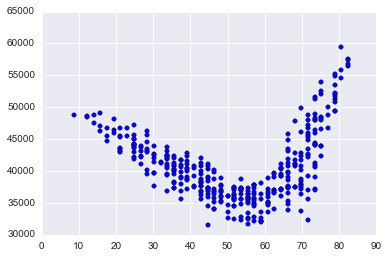

In [205]:
plot_regression()

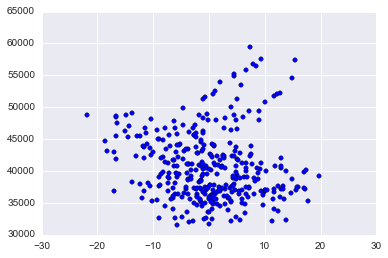

In [232]:
plt.scatter(daily_data.avg_deviation, daily_data["MWH.1"])

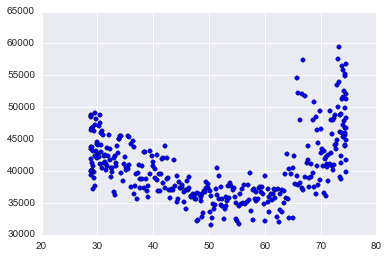

In [234]:
plt.scatter(daily_data.ave_climate, daily_data["MWH.1"])

In [5]:
daily_data.head()

NameError: name 'daily_data' is not defined